<h1 align="center">K-Means</h1>

<br>

The basics of K-Means clustering in Python using the classic iris dataset. Made this tutorial to freshen up my memory on K-Means.

<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
X, y = load_iris(return_X_y=True)

In [5]:
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

Shape of X: (150, 4)
Shape of y: (150,)


In [9]:
# Find the optimal number of clusters
SSE = []    # Sum of the squared errors
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    SSE.append(km.inertia_)

- Inertia is the **cluster sum of squares**. 
- The optimal number of clusters can be found using *inertia*.
- Unsupervised $\boldsymbol{\rightarrow}$ meaning there are no y (label) values to compare the output that we generate. Therefore, we use *inertia*.

Inertia formula:

\begin{equation}
    \large\sum_{i=1}^{N} (x_i - C_k)²,
\end{equation}

where N is the number of samples, $x_i$ is the ith value of a sample, and C is the center of the cluster. This equation sums up each data points distance from the center (and squares it).

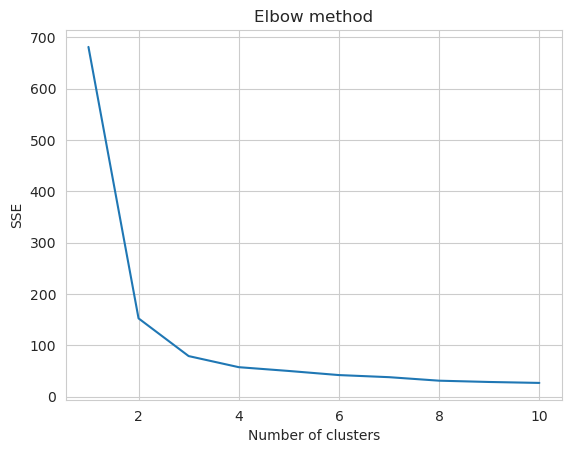

In [42]:
sns.set_style('whitegrid')
g = sns.lineplot(x=range(1,11), y=SSE)
g.set(xlabel='Number of clusters',
      ylabel='SSE',
      title='Elbow method');

In [19]:
model = KMeans(n_clusters=3, random_state=2)
model.fit(X)

KMeans(n_clusters=3, random_state=2)

In [46]:
# Find the cluster centers
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [29]:
pred = model.predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

<br>

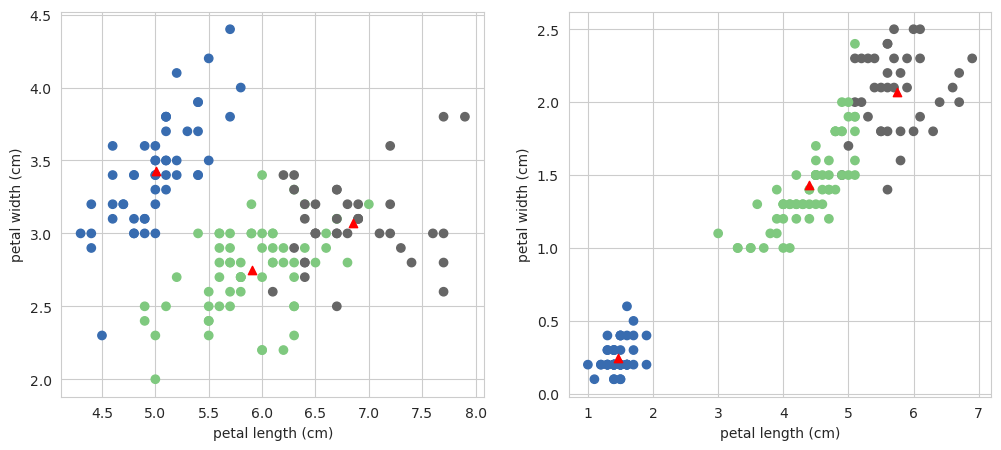

In [39]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=pred, cmap=cm.Accent)
plt.grid(True)
for center in model.cluster_centers_:
    # Two first cluster centers (corresponding to features X0, X1)
    center = center[:2]
    plt.scatter(center[0], center[1], marker='^', c='red')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

##################################################################

plt.subplot(1,2,2)
plt.scatter(X[:,2], X[:,3], c=pred, cmap=cm.Accent)
plt.grid(True)
for center in model.cluster_centers_:
    # Two first cluster centers (corresponding to features X0, X1)
    center = center[2:4]
    plt.scatter(center[0], center[1], marker='^', c='red')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

- If provided with a list of scalar values, the **c** argument colors the data points based on their scalar value (this way the data points belonging into the same cluster will be colored with the same color. e.g., 1, 1, 1 will be the same color, and 2, 2, 2 will be the same color).

- plt.subplot(num_rows, num_cols, index_of_current_subplot)